In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt 

NAME_FILE = '../name_mapping.json'
f = open(NAME_FILE)
name_data = json.load(f)

In [3]:
TRAIL_MAKING_CSV = '../data/trail_making.csv'

data = pd.read_csv(TRAIL_MAKING_CSV)

In [4]:
renamed_tm = data.rename(columns=name_data)
renamed_tm

,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path)
0,1000085,43.202,64.591,0.0,0.0
1,1000158,48.845,96.175,3.0,5.0
2,1000251,23.656,36.673,0.0,0.0
3,1000279,25.344,51.384,0.0,1.0
4,1000295,33.183,52.936,0.0,0.0
...,...,...,...,...,...
104009,6024594,48.132,59.984,3.0,0.0
104010,6024683,53.382,57.337,5.0,0.0
104011,6024781,24.867,44.819,0.0,0.0
104012,6024822,47.510,71.331,0.0,0.0


In [5]:
# renamed_tm.to_csv('../processed_data/trail_making.csv', index=False)

Text(0.5, 1.0, 'Total time distribution for numeric and alphanumeric trail')

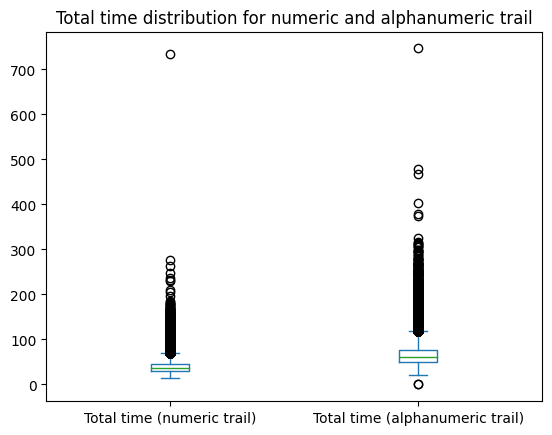

In [6]:
renamed_tm[['Total time (numeric trail)', 'Total time (alphanumeric trail)']].plot.box()
plt.title('Total time distribution for numeric and alphanumeric trail')

In [7]:
renamed_tm[['Total time (numeric trail)', 'Total time (alphanumeric trail)']].describe()

,Total time (numeric trail),Total time (alphanumeric trail)
count,104014.000000,104014.000000
mean,39.193717,66.803595
std,14.998772,25.755399
min,13.666000,0.000000
25%,29.216000,49.584000
50%,35.693500,61.182500
75%,45.079000,77.350500
max,733.970000,746.531000


# Check if numeric and alphanumeric trails follow the same trend 

In [9]:
age_df = pd.read_csv('../data/age.csv').rename(columns=name_data)
gender_df = pd.read_csv('../data/gender.csv').rename(columns=name_data)

new_tm = pd.merge(renamed_tm, age_df, on='subject_id', how='inner')

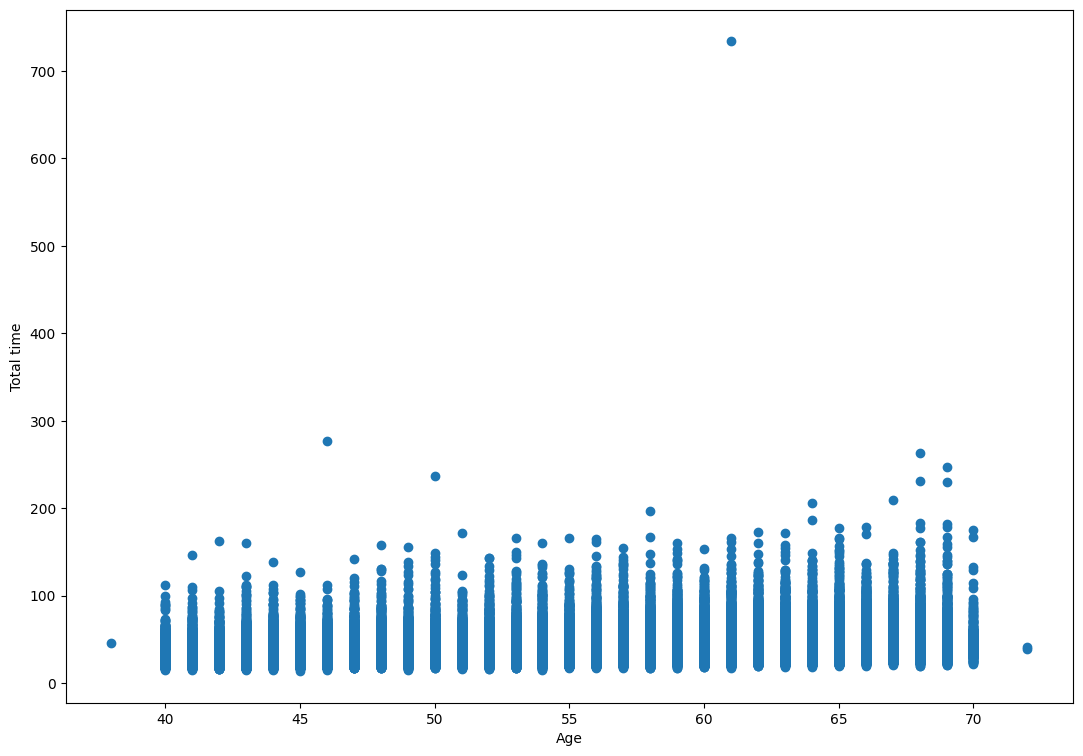

In [11]:
import seaborn as sns

plt.figure(figsize=(13,9))
plt.scatter(new_tm['age'], new_tm['Total time (numeric trail)'])
plt.xlabel('Age')
plt.ylabel('Total time')
plt.show()